In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
df = pd.read_csv('data/spygea_2.csv')
display(df)

,id,commented_sec,comment,is_emoticon
0,0,9.984,spygeaDoya spygeaDoya spygeaHi,True
1,1,14.802,こんばんは,False
2,2,19.319,こんばんは spygeaHi,True
3,3,19.408,こんばんは〜〜 spygeaHi spygeaHi,True
4,4,24.908,ギアさんリスナーさんこんばんは KonCha KonCha,True
...,...,...,...,...
16640,16640,18231.645,お疲れ様でした！,False
16641,16641,18232.148,spygeaZz spygeaZz spygeaZz spygeaZz spygeaZz,True
16642,16642,18233.230,spygeaZz spygeaZz spygeaZz,True
16643,16643,18233.234,お疲れ様です！また楽しみです！ spygeaZz spygeaZz spygeaZz,True


In [3]:
df['commented_min'] = df['commented_sec'] // 60
df['commented_min']  = df['commented_min'] .astype(int)

In [4]:
# コメント末尾が草
df['has_w'] = df['comment'].apply(lambda x : 1if (x[-1] == 'w') or (x[-1] == 'W') or (x[-1] == 'ｗ') or (x[-1] == 'W') or (x[-1] ==  '草') else 0)

In [5]:
# スタンプ
df['is_emoticon_enc'] = df['is_emoticon'].apply(lambda x : 1 if x else 0)

In [6]:
display(df)

,id,commented_sec,comment,is_emoticon,commented_min,has_w,is_emoticon_enc
0,0,9.984,spygeaDoya spygeaDoya spygeaHi,True,0,0,1
1,1,14.802,こんばんは,False,0,0,0
2,2,19.319,こんばんは spygeaHi,True,0,0,1
3,3,19.408,こんばんは〜〜 spygeaHi spygeaHi,True,0,0,1
4,4,24.908,ギアさんリスナーさんこんばんは KonCha KonCha,True,0,0,1
...,...,...,...,...,...,...,...
16640,16640,18231.645,お疲れ様でした！,False,303,0,0
16641,16641,18232.148,spygeaZz spygeaZz spygeaZz spygeaZz spygeaZz,True,303,0,1
16642,16642,18233.230,spygeaZz spygeaZz spygeaZz,True,303,0,1
16643,16643,18233.234,お疲れ様です！また楽しみです！ spygeaZz spygeaZz spygeaZz,True,303,0,1


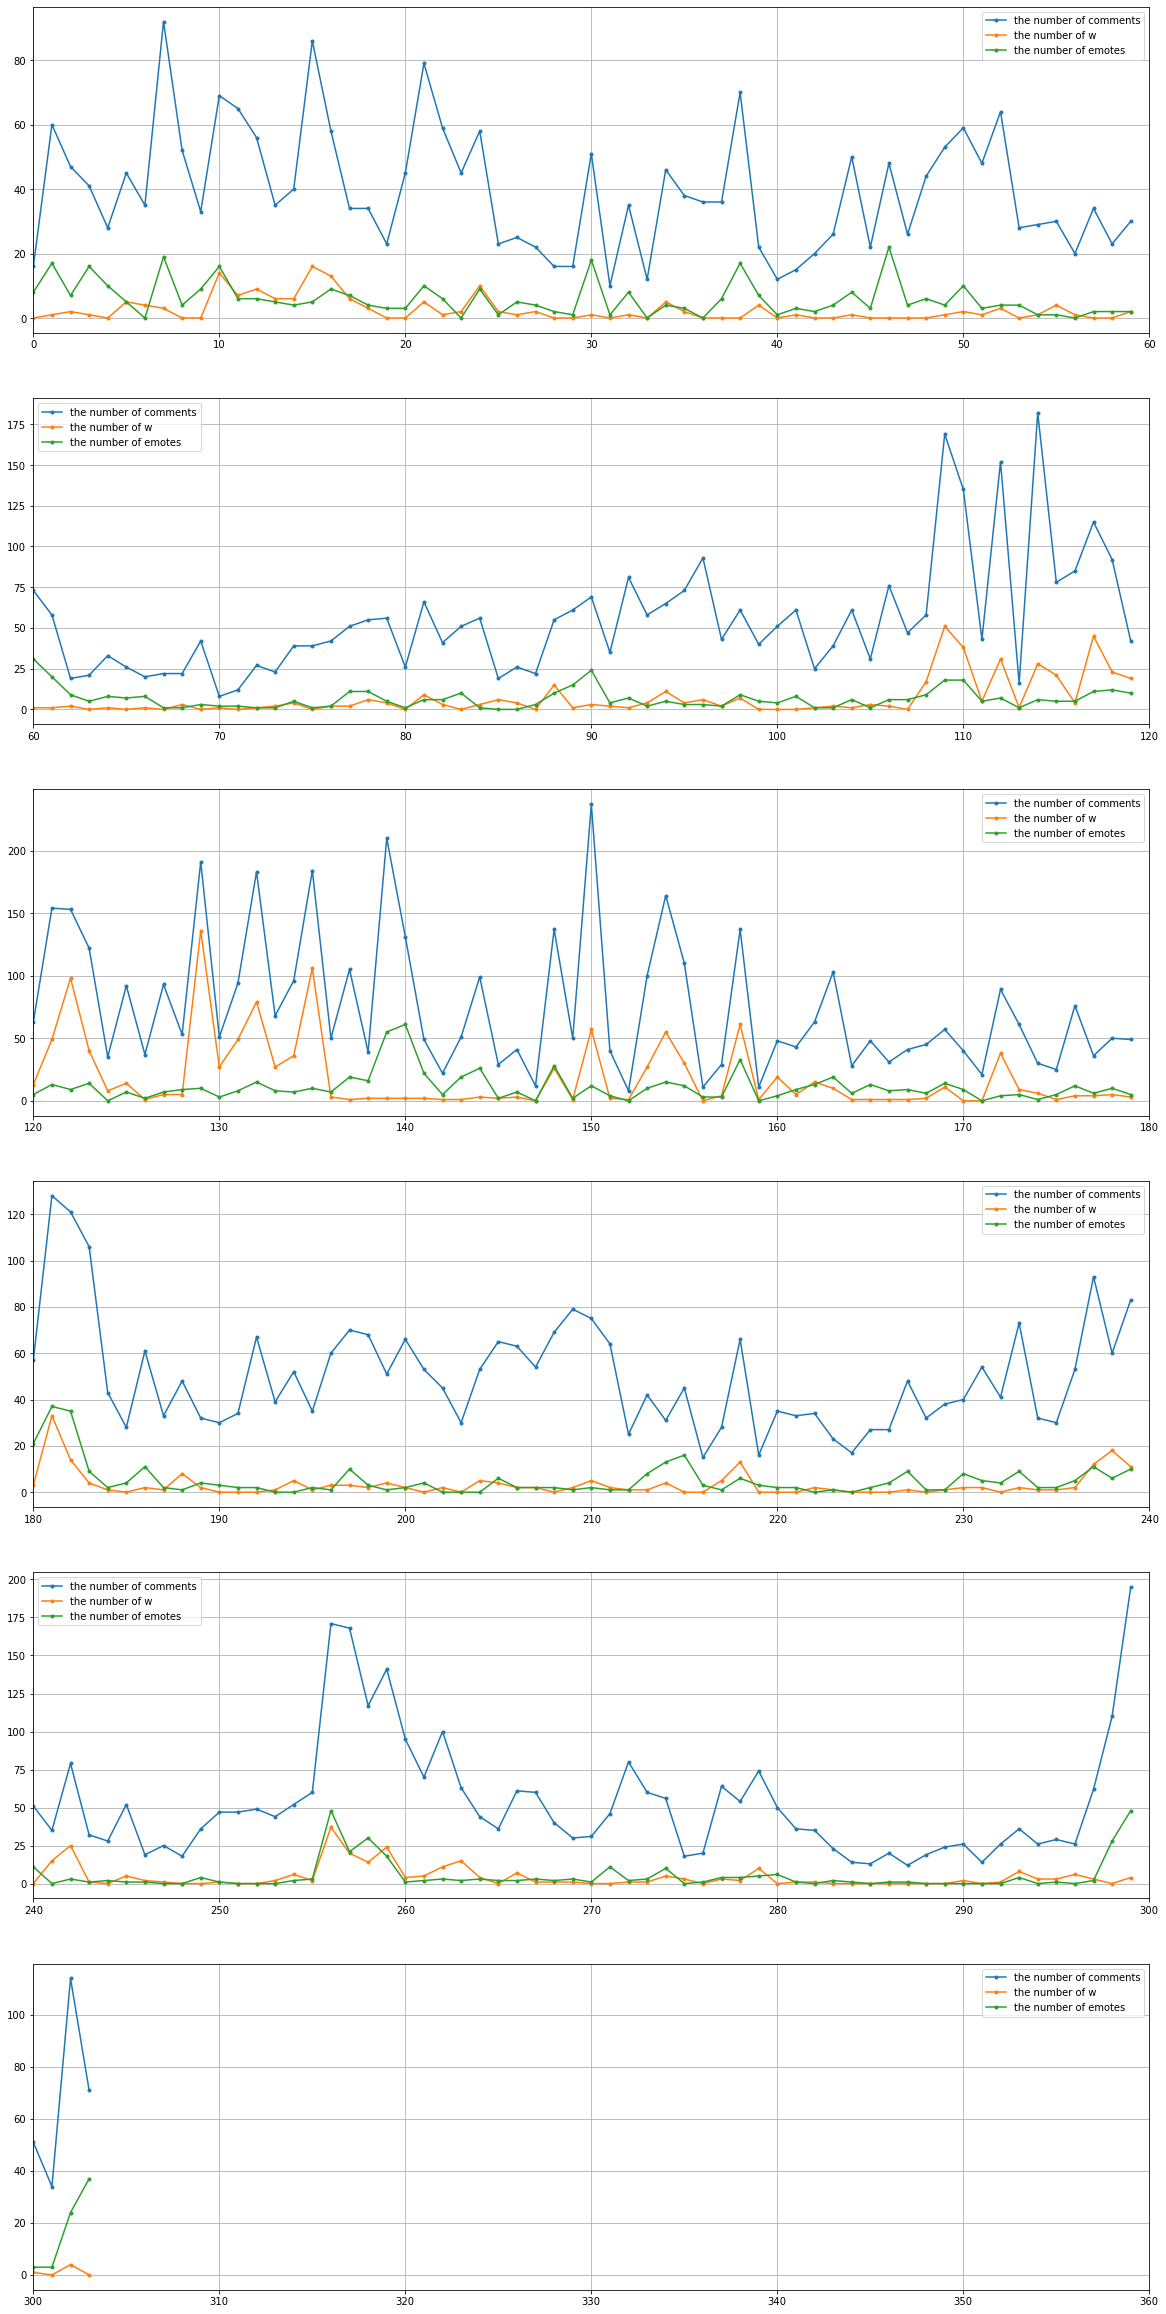

In [8]:
# 最後のコメントが投稿された時間（分）
last_commented_minutes = df.iat[-1, 4]

# グラフの個数は、last_commented_minutesを使い動的に指定。60分ごとにグラフを描画。
graph_number = last_commented_minutes // 60  + 1

# figsizeはgraph_numberを使い動的に指定。グラフ１つあたり(20,7)を割り当てる。
fig, ax = plt.subplots(graph_number, 1, figsize=(20,  graph_number * 7))

for first_index in range(0, last_commented_minutes + 1, 60):
    # x軸の値　コメントが投稿された時間（分刻み）
    x = df.groupby('commented_min').count().iloc[first_index : first_index + 60].index
    
    # 1分間あたりのコメント数のグラフ
    ax[(first_index + 1) // 60].plot(x, df.groupby('commented_min').count().iloc[first_index : first_index + 60].id.values, marker=".", label='the number of comments')
    # 1分間あたりの'w'、'草'の数のグラフ
    ax[(first_index + 1) // 60].plot(x, df.groupby('commented_min').sum().iloc[first_index : first_index + 60].has_w.values, marker=".",label='the number of w')
    # 1分間あたりのスタンプの数のグラフ
    ax[(first_index + 1) // 60].plot(x, df.groupby('commented_min').sum().iloc[first_index : first_index + 60].is_emoticon_enc.values, marker=".", label='the number of emotes')
    
    ax[(first_index + 1) // 60].grid(axis='both')
    ax[(first_index + 1) // 60].set_xlim(first_index, first_index + 60)
    ax[(first_index + 1) // 60].legend()
plt.show()